# HEOM Tutorial

This tutorial you will learn:

- how to compute the population/coherence dynamics of a quantum system embedded in a bath
- how to compute the absorption lineshapes

To do both of these calculations, we are going to use the Hierarchy of Equations of Motion (HEOM).

We consider an excitonic dimer complex as an example. This is a 3-level system: a ground state and 2 degenerate excited states corresponding to the excitation on each of two molecules forming a dimer. The molecules of the dimer are coupled to each other but not to the ground state.

In [1]:
import cmath
import sys
import cmath
import math
import os
import h5py
import matplotlib.pyplot as plt   # plots
#matplotlib.use('Agg')
#%matplotlib inline 

import numpy as np
#from matplotlib.mlab import griddata


if sys.platform=="cygwin":
    from cyglibra_core import *
elif sys.platform=="linux" or sys.platform=="linux2":
    from liblibra_core import *
import util.libutil as comn
from libra_py import units
import libra_py.dynamics.heom.compute as compute
from libra_py import ft


plt.rc('axes', titlesize=38)      # fontsize of the axes title
plt.rc('axes', labelsize=38)      # fontsize of the x and y labels
plt.rc('legend', fontsize=38)     # legend fontsize
plt.rc('xtick', labelsize=38)    # fontsize of the tick labels
plt.rc('ytick', labelsize=38)    # fontsize of the tick labels

plt.rc('figure.subplot', left=0.2)
plt.rc('figure.subplot', right=0.95)
plt.rc('figure.subplot', bottom=0.13)
plt.rc('figure.subplot', top=0.88)

colors = {}

colors.update({"11": "#8b1a0e"})  # red       
colors.update({"12": "#FF4500"})  # orangered 
colors.update({"13": "#B22222"})  # firebrick 
colors.update({"14": "#DC143C"})  # crimson   

colors.update({"21": "#5e9c36"})  # green
colors.update({"22": "#006400"})  # darkgreen  
colors.update({"23": "#228B22"})  # forestgreen
colors.update({"24": "#808000"})  # olive      

colors.update({"31": "#8A2BE2"})  # blueviolet
colors.update({"32": "#00008B"})  # darkblue  

colors.update({"41": "#2F4F4F"})  # darkslategray

clrs_index = ["11", "21", "31", "41", "12", "22", "32", "13","23", "14", "24"]

/home/storytemen/miniconda2/envs/py37/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
  return f(*args, **kwds)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, false> > already registered; second conversion method ignored.
  return f(*args, **kwds)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::vector<flo

## 1. Population and coherence dynamics

In this example, we do couple each of the monomers to the ground state. We also start from the ground state and observe how the population and coherences of states evolve

In [2]:
from libra_py import units
import libra_py.dynamics.heom.compute as compute

J = 0.1   # in atomic units
Omega = 1.5*J

# Hamiltonian
Ham = CMATRIX(3,3)
Ham.set(0, 0, Omega*(0.0+0.0j));  Ham.set(0, 1,     J*(-1.0+0.0j) );  Ham.set(0, 2,     J*(-1.0+0.0j));
Ham.set(1, 0,     J*(-1.0+0.0j)); Ham.set(1, 1, Omega*(1.0+0.0j)  );  Ham.set(1, 2,     J*(-1.0+0.0j));
Ham.set(2, 0,     J*(-1.0+0.0j)); Ham.set(2, 1,     J*(-1.0+0.0j) );  Ham.set(2, 2, Omega*(1.0+0.0j) );

# Initial density matrix
rho = CMATRIX(3,3); rho.set(0, 0, 1.0+0.0j) # starting state = initial state

# Electron-Phonon couplings as F[m] = |m><m|
Q = CMATRIXList()
Q.append(CMATRIX(3,3)); Q[0].set(0,0, 0.0+0.0j )
Q.append(CMATRIX(3,3)); Q[1].set(1,1, 1.0+0.0j )
Q.append(CMATRIX(3,3)); Q[2].set(2,2, 1.0+0.0j )

# Parameters
params = { "KK":0, "LL":10, "gamma": 0.3*J, "eta": 4.0 * J,
           "temperature": (J/(2.0 * units.kB)), "el_phon_couplings":Q,
           "dt":0.1, "nsteps":1000, "verbosity":-1, "progress_frequency":0.1,
           "truncation_scheme":4, "do_scale":1,
           "adm_tolerance":1e-15, "adm_deriv_tolerance":1e-25,
           "filter_after_steps":1, "do_zeroing":0,
           "num_threads":4,"prefix":"out", 
           "hdf5_output_level":0, "txt_output_level":0, "mem_output_level":3,
           "properties_to_save": [ "timestep", "time", "denmat"],
           "use_compression":0, "compression_level":[0,0,0]
         }

# Run the actual calculations
compute.run_dynamics(params, Ham, rho)

 step= 0
 step= 100
 step= 200
 step= 300
 step= 400
 step= 500
 step= 600
 step= 700
 step= 800
 step= 900
Calculations took 2.5636420249938965 seconds
In mem_saver.save_data()
data_name =  ['timestep', 'time', 'denmat']
keywords =  ['timestep', 'time', 'denmat']
keys =  dict_keys(['timestep', 'time', 'denmat'])
Saving the dataset named timestep/data
Saving the dataset named time/data
Saving the dataset named denmat/data


Print the computed results ( in the out/mem_data.hdf) as well as the reference results (in the rho.out file)

/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex val

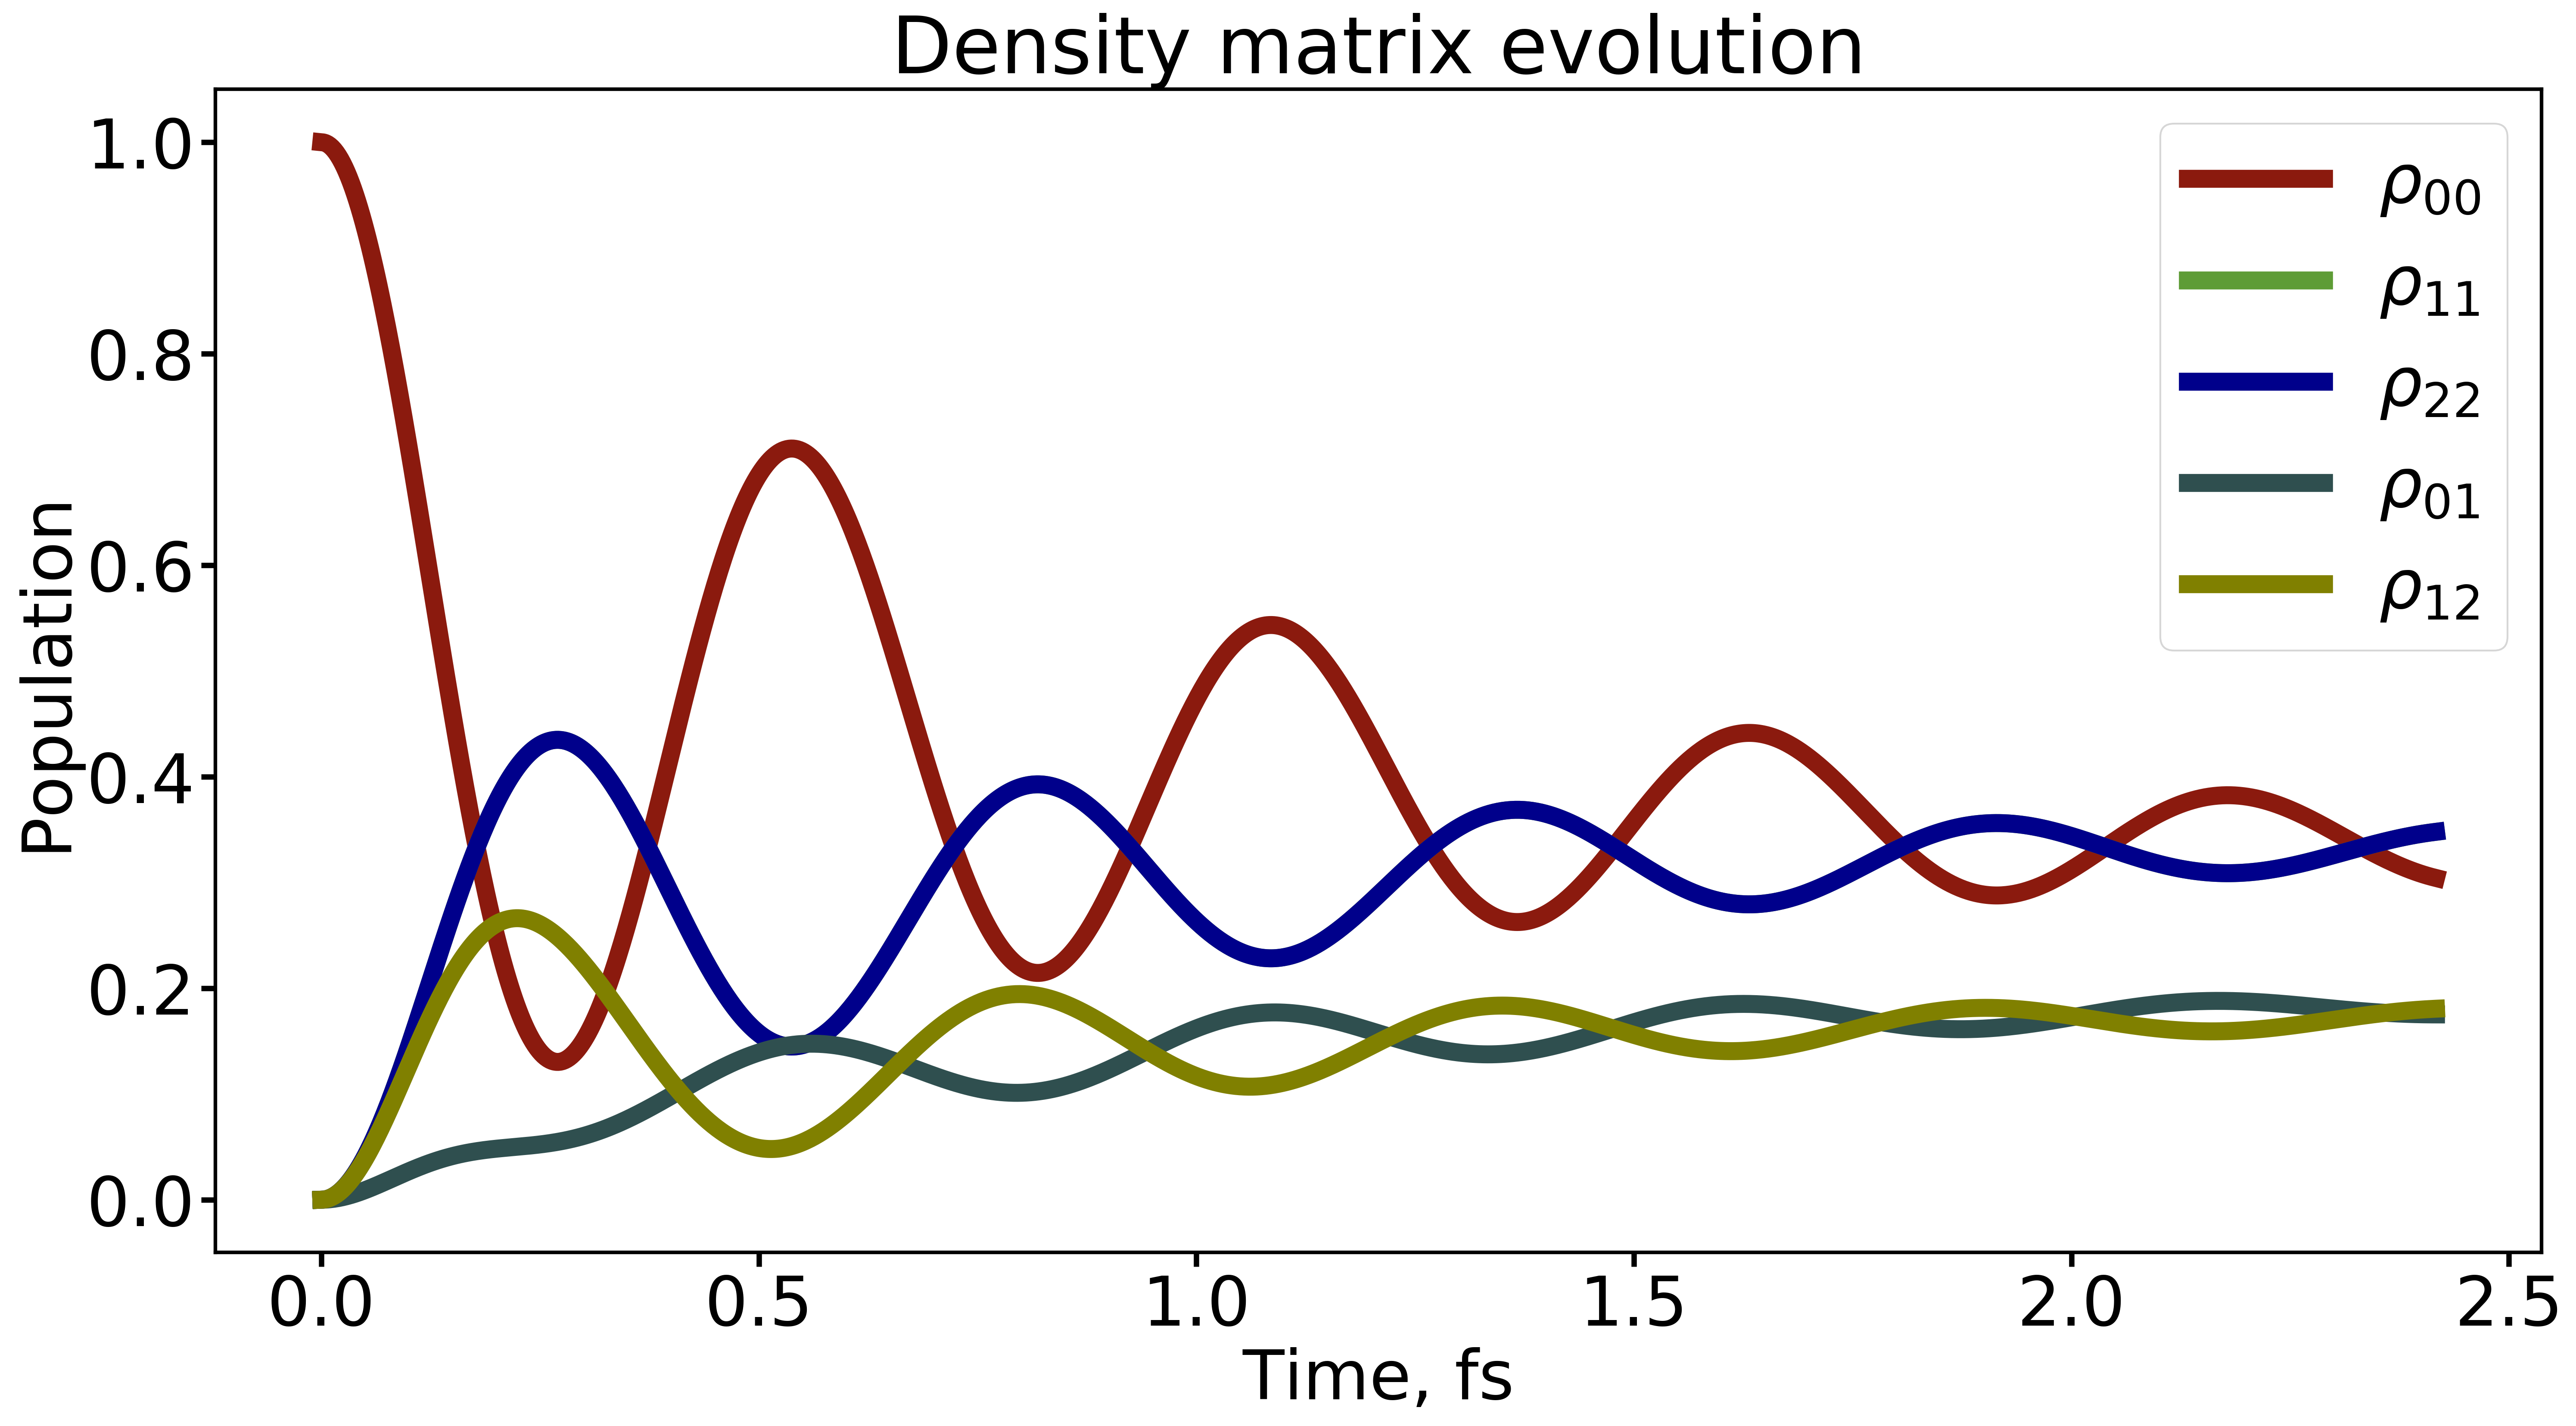

In [3]:
time, pop0, pop1, pop2, coherence01, coherence12 = None, None, None, None, None, None

with h5py.File(F"out/mem_data.hdf", 'r') as f:
    time = list(f["time/data"][:] * units.au2fs)
    pop0 = list(f["denmat/data"][:, 0,0])
    pop1 = list(f["denmat/data"][:, 1,1])
    pop2 = list(f["denmat/data"][:, 2,2])
    coherence01 = list(f["denmat/data"][:, 0,1])
    coherence12 = list(f["denmat/data"][:, 1,2])

    
plt.figure(1, figsize=(24, 12), dpi=300, frameon=False)
plt.subplot(1,1,1)
plt.title('Density matrix evolution', fontsize=44)
plt.xlabel('Time, fs')
plt.ylabel('Population')
ax = plt.gca()
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.tick_params(length=8, width=3)
plt.plot(time, pop0, label='$\\rho_{00}$', linewidth=10, color = colors["11"]) 
plt.plot(time, pop1, label='$\\rho_{11}$', linewidth=10, color = colors["21"]) 
plt.plot(time, pop2, label='$\\rho_{22}$', linewidth=10, color = colors["32"]) 
plt.plot(time, coherence01, label='$\\rho_{01}$', linewidth=10, color = colors["41"]) 
plt.plot(time, coherence12, label='$\\rho_{12}$', linewidth=10, color = colors["24"]) 
plt.legend()
plt.show()
plt.close()

## 2. Absorption lineshape calculations

We are now moving to compute the spectral lineshapes. 

First, we now assume the excited states aren't coupled to the ground state (to be consistent with the published works)

Second, we need to compute the ACF of the system's dipole moment operator, so we define the transition dipole matrix operator. It's evolution is determined via the evolution of the density matrix.

Third, our initial conditions are described by the initial ground state wavefunction evolved according to the transition dipole moment operator. That is we start not with $\rho$, but with $\mu \rho$

We shall do this for two temperatures

In [4]:
J = 0.1   # in atomic units
Omega = 1.5*J

# Hamiltonian
Ham = CMATRIX(3,3)

Ham.set(0, 0, Omega*(0.0+0.0j));  Ham.set(0, 1,     J*(0.0+0.0j) );   Ham.set(0, 2,     J*(0.0+0.0j));
Ham.set(1, 0,     J*(0.0+0.0j));  Ham.set(1, 1, Omega*(1.0+0.0j)  );  Ham.set(1, 2,     J*(-1.0+0.0j));
Ham.set(2, 0,     J*(0.0+0.0j));  Ham.set(2, 1,     J*(-1.0+0.0j) );  Ham.set(2, 2, Omega*(1.0+0.0j) );

# Dipole operator
mu = CMATRIX(3,3)
mu.set(0,0, 0.0+0.0j);  mu.set(0,1, 1.0+0.0j);   mu.set(0,2, 1.0+0.0j); 
mu.set(1,0, 1.0+0.0j);  mu.set(1,1, 0.0+0.0j);   mu.set(1,2, 0.0+0.0j); 
mu.set(2,0, 1.0+0.0j);  mu.set(2,1, 0.0+0.0j);   mu.set(2,2, 0.0+0.0j); 

# Initial density matrix
rho = CMATRIX(3,3); rho.set(0, 0, 1.0+0.0j) # starting state
rho = mu * rho  # initial condition - accounts for the initial excitation

# Electron-Phonon couplings as F[m] = |m><m|
Q = CMATRIXList()
Q.append(CMATRIX(3,3)); Q[0].set(0,0, 0.0+0.0j )
Q.append(CMATRIX(3,3)); Q[1].set(1,1, 1.0+0.0j )
Q.append(CMATRIX(3,3)); Q[2].set(2,2, 1.0+0.0j )

# Parameters
params = { "KK":0, "LL":10, "gamma": 0.3*J, "eta": 4.0 * J,
           "temperature": (J/(2.0 * units.kB)), "el_phon_couplings":Q,
           "dt":0.1, "nsteps":1000, "verbosity":-1, "progress_frequency":0.1,
           "truncation_scheme":4, "do_scale":1,
           "adm_tolerance":1e-15, "adm_deriv_tolerance":1e-25,
           "filter_after_steps":1, "do_zeroing":0,
           "num_threads":4,"prefix":"out_spectra_0", 
           "hdf5_output_level":0, "txt_output_level":0, "mem_output_level":3,
           "properties_to_save": [ "timestep", "time", "denmat"],
           "use_compression":0, "compression_level":[0,0,0]
         }

# Run the actual calculations
compute.run_dynamics(params, Ham, rho)

# For another temperature
params.update( {"temperature": (J/(5.0 * units.kB)), "prefix":"out_spectra_1" } )
compute.run_dynamics(params, Ham, rho)

 step= 0
 step= 100
 step= 200
 step= 300
 step= 400
 step= 500
 step= 600
 step= 700
 step= 800
 step= 900
Calculations took 2.425474166870117 seconds
In mem_saver.save_data()
data_name =  ['timestep', 'time', 'denmat']
keywords =  ['timestep', 'time', 'denmat']
keys =  dict_keys(['timestep', 'time', 'denmat'])
Saving the dataset named timestep/data
Saving the dataset named time/data
Saving the dataset named denmat/data
 step= 0
 step= 100
 step= 200
 step= 300
 step= 400
 step= 500
 step= 600
 step= 700
 step= 800
 step= 900
Calculations took 2.3755645751953125 seconds
In mem_saver.save_data()
data_name =  ['timestep', 'time', 'denmat']
keywords =  ['timestep', 'time', 'denmat']
keys =  dict_keys(['timestep', 'time', 'denmat'])
Saving the dataset named timestep/data
Saving the dataset named time/data
Saving the dataset named denmat/data


Using the computed evolution of density matrix (now stored in the file), lets compute the evolution of the dipole moment operator autocorrelation function (ACF)

In [5]:
time = None
acf = [ [], [] ]

for temp_indx in [0, 1]:
    with h5py.File(F"out_spectra_{temp_indx}/mem_data.hdf", 'r') as f:
        time = list(f["time/data"][:] * units.au2fs)       
        nsteps = f["denmat/data"].shape[0]
        
        rho = CMATRIX(3,3)    
    
        for step in range(nsteps):        
            for i in range(f["denmat/data"].shape[1]):
                for j in range(f["denmat/data"].shape[2]):
                    rho.set(i,j, f["denmat/data"][step, i,j] )
                
            ct = (mu * rho).tr().real
            acf[temp_indx].append(ct)
           

And plot 

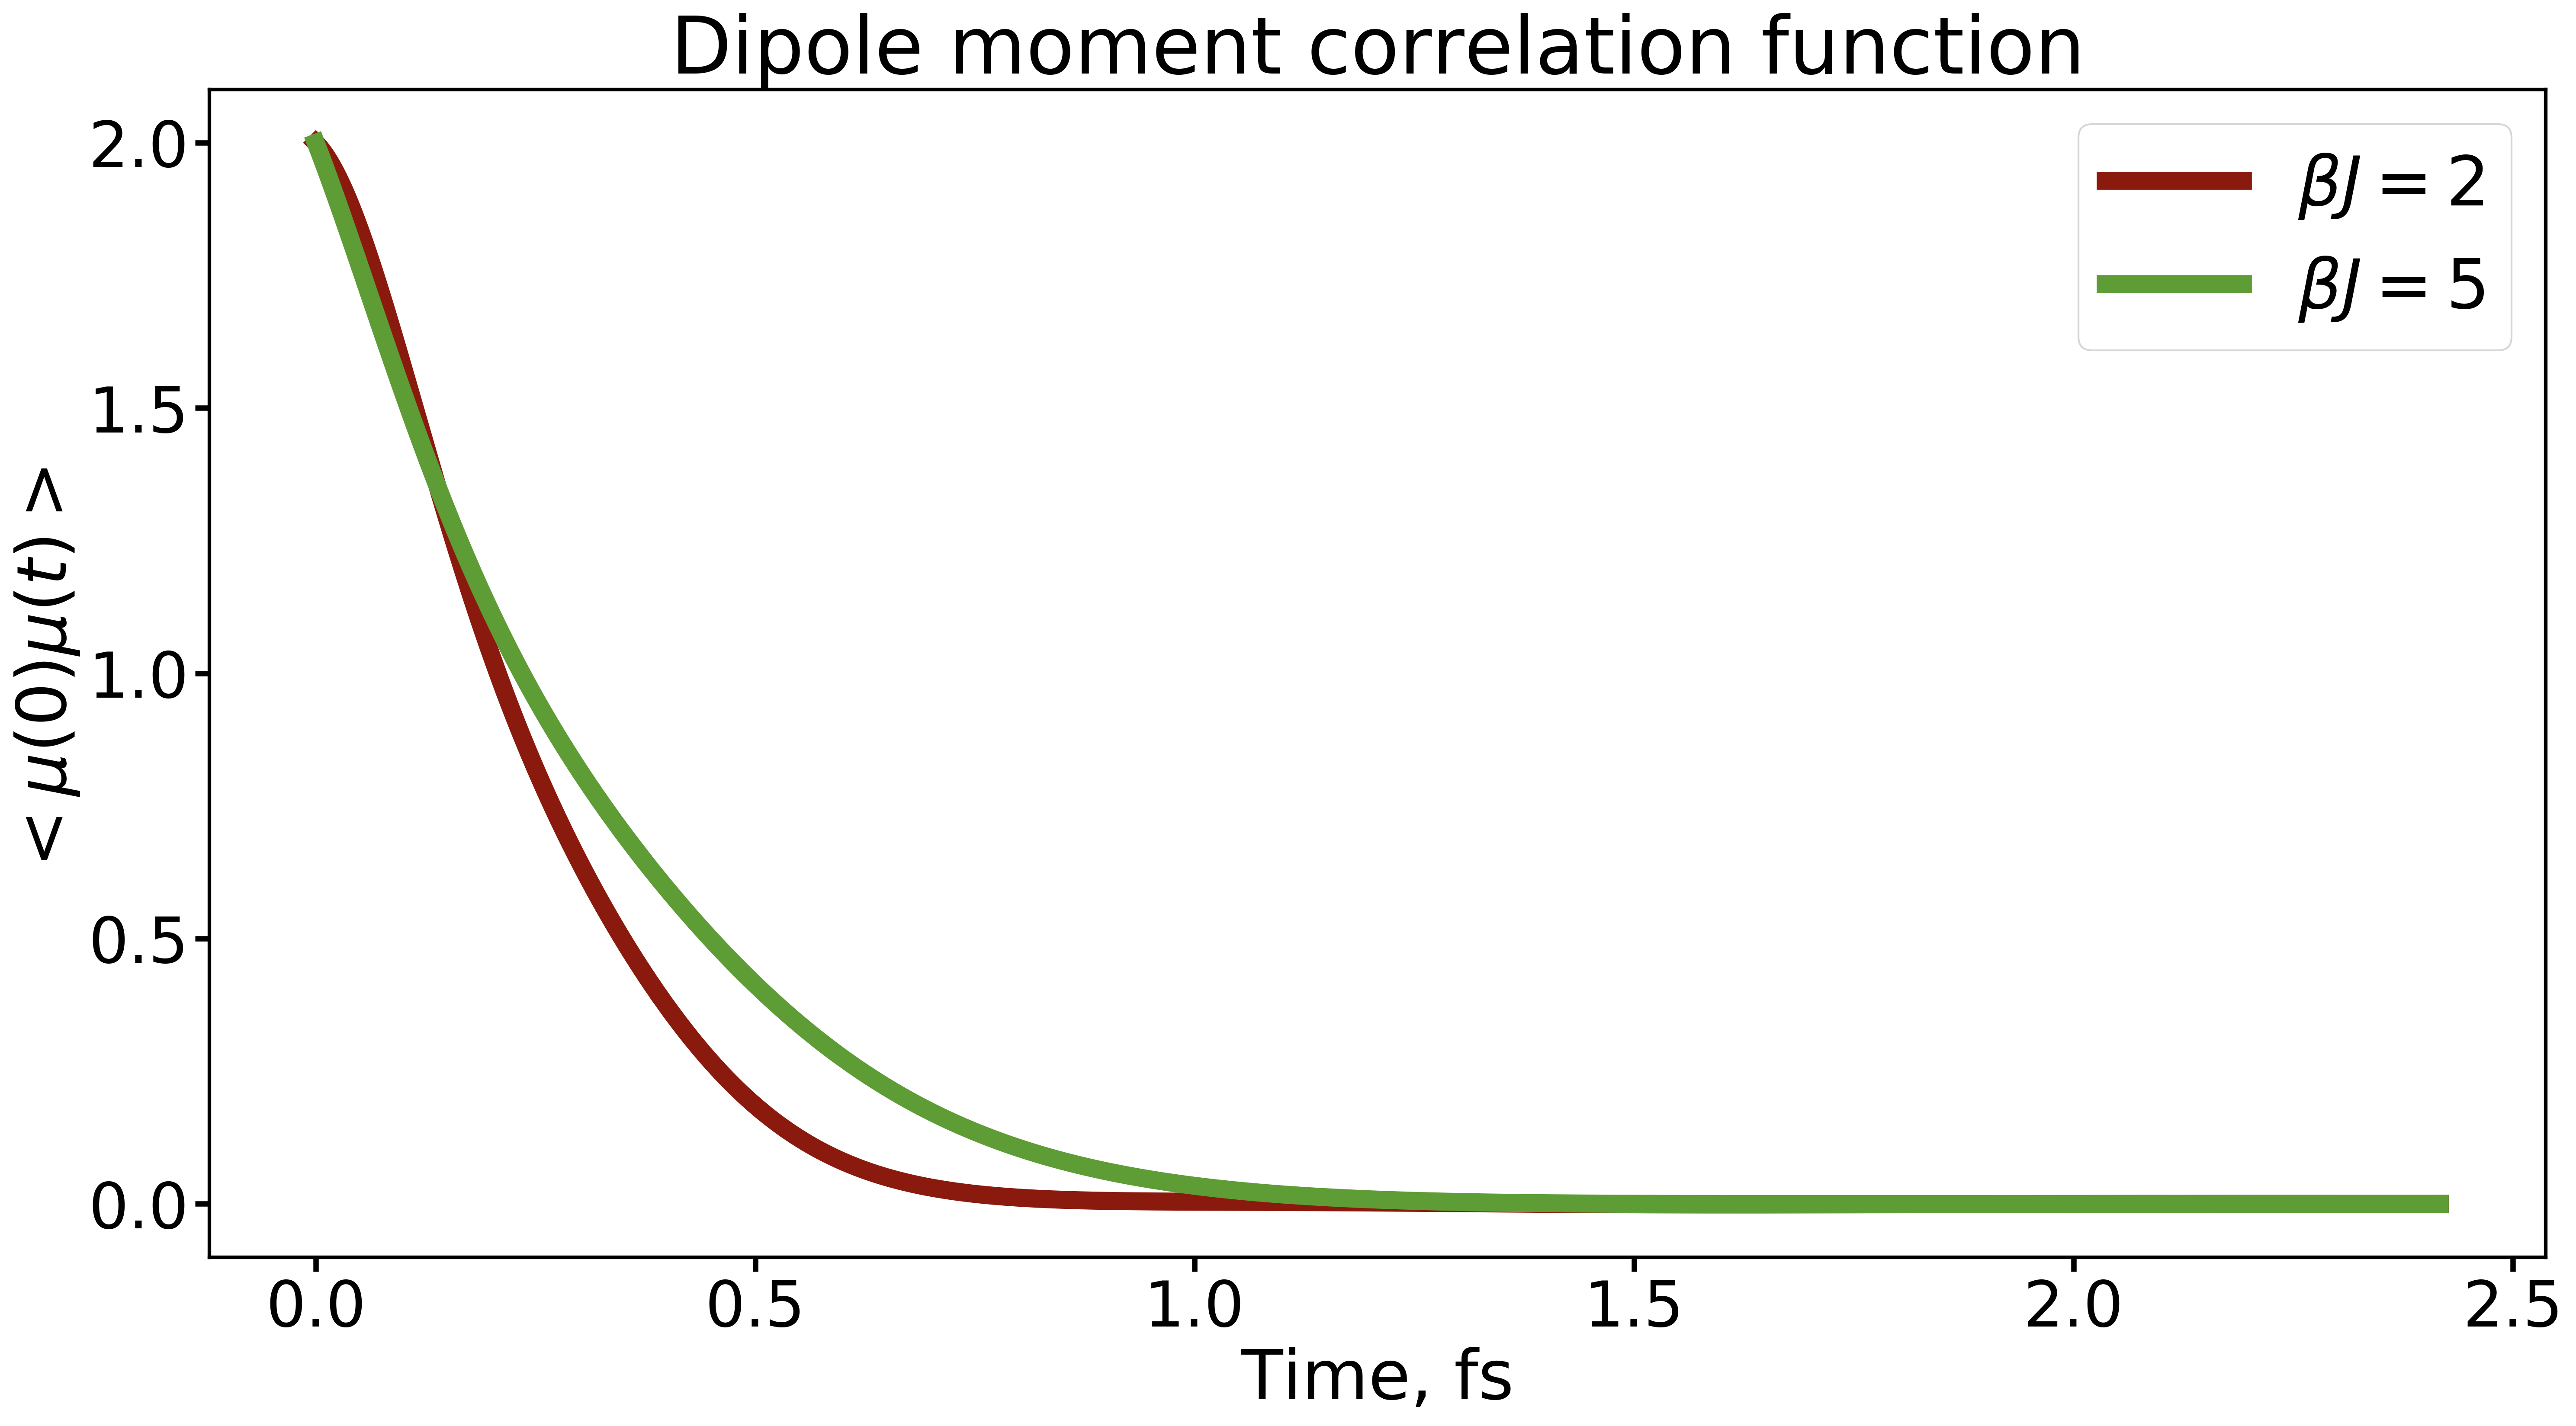

In [6]:
plt.figure(2, figsize=(24, 12), dpi=300, frameon=False)
plt.subplot(1,1,1)
ax = plt.gca()
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.tick_params(length=8, width=3, labelsize=35)
plt.yticks((0, 0.5, 1, 1.5, 2))
plt.title('Dipole moment correlation function', fontsize=44)
plt.xlabel('Time, fs')
plt.ylabel('$<\mu(0) \mu(t)>$')
plt.plot(time, acf[0], label="$\\beta J = 2$", linewidth=10, color = colors["11"]) 
plt.plot(time, acf[1], label="$\\beta J = 5$", linewidth=10, color = colors["21"]) 
plt.legend()
plt.show()
plt.close()

Lets do the Fourier transform of the ACF

In [7]:
wmin = -6.0*J + Omega
wmax = 4.0*J + Omega
dt = params["dt"]
dw = (wmax-wmin)/(params["nsteps"]) 

W, intensity = None, [[] , [] ]
for temp_indx in [0, 1]:
    W, ampl, I, I2, intensity[temp_indx], ampl_im = \
    ft.ft2(acf[temp_indx], wmin, wmax, dw, dt)

# Normalization of the y axis
for temp_indx in [0, 1]:
    for ind, val in enumerate(intensity[temp_indx]):
        intensity[temp_indx][ind] = 0.5*val/math.pi
    
# Shift and scaling of the x axis
W_shifted = []
for w in W:
    W_shifted.append( (w-Omega)/J )

And print the spectrum

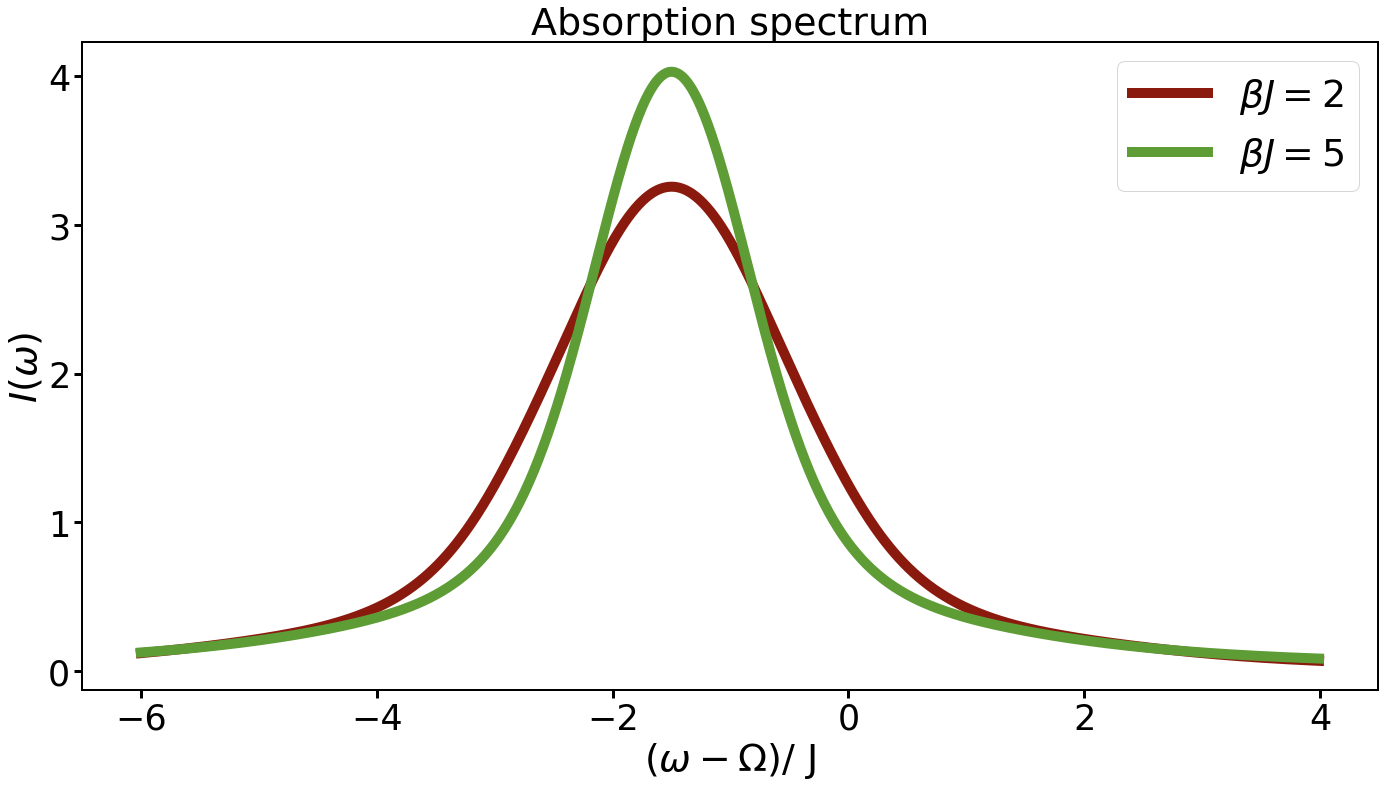

In [8]:
plt.figure(3, figsize=(24, 12)) # dpi=300, frameon=False)
plt.subplot(1,1,1)
ax = plt.gca()
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.tick_params(length=8, width=3, labelsize=35)
plt.title('Absorption spectrum')
plt.xlabel('$(\omega - \Omega)$/ J')
plt.ylabel('$I(\omega)$')
plt.plot(W_shifted, intensity[0], label="$\\beta J = 2$", linewidth=10, color = colors["11"]) 
plt.plot(W_shifted, intensity[1], label="$\\beta J = 5$", linewidth=10, color = colors["21"]) 
plt.yticks((0, 1, 2, 3, 4))
plt.legend()
plt.show()
plt.close()